<a href="https://colab.research.google.com/github/hannahpu/widsdatathon2022/blob/main/notebook/diana_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# repo: https://github.com/hannahpu/widsdatathon2022
! git clone https://github.com/hannahpu/widsdatathon2022.git

Cloning into 'widsdatathon2022'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 3), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
# # run this line of code when there is update in git repo
# %cd /content/widsdatathon2022
# ! git pull

In [ ]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

wids_path = "/content/widsdatathon2022"
sys.path.append(wids_path)
import data_utils
import global_vars as gv

sns.set_context("talk")

In [ ]:
train_df = pd.read_csv(f"{wids_path}/data/train.csv")
train_df.columns = train_df.columns.str.lower()

# Quick Data Exploration

In [ ]:
print(train_df.shape)
print(train_df.columns)

(75757, 64)
Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', '

In [ ]:
def quick_visualize_raw_features(train_df: pd.DataFrame, figsize: tuple=(10, 6)):
  # Numerical/continuous cols
  temp_col_list = ['january_min_temp', 'january_avg_temp', 'january_max_temp',
        'february_min_temp', 'february_avg_temp', 'february_max_temp',
        'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
        'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
        'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
        'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
        'august_avg_temp', 'august_max_temp', 'september_min_temp',
        'september_avg_temp', 'september_max_temp', 'october_min_temp',
        'october_avg_temp', 'october_max_temp', 'november_min_temp',
        'november_avg_temp', 'november_max_temp', 'december_min_temp',
        'december_avg_temp', 'december_max_temp', 'avg_temp']
  wind_col_list = ['direction_max_wind_speed', 'direction_peak_wind_speed', 
                   'max_wind_speed']
  days_col_list = ['cooling_degree_days', 'heating_degree_days', 
                   'days_below_30f', 'days_below_20f',
                   'days_below_10f', 'days_below_0f', 'days_above_80f', 
                   'days_above_90f', 'days_above_100f', 'days_above_110f', 
                   'days_with_fog',]
  inch_col_list = ['precipitation_inches', 'snowfall_inches', 'snowdepth_inches'] 

  plot_dict = {'temp': temp_col_list,
               'days': days_col_list, 
              'wind_speed': wind_col_list,
              'inches': inch_col_list}
  for unit, col_list in plot_dict.items():
    plt.figure(figsize=figsize)
    melt_df = pd.melt(train_df, id_vars='id', value_vars=col_list, 
                      var_name='variable', value_name=unit)
    ax = sns.boxplot(data=melt_df, x='variable', y=unit)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

  # Other continuous variables
  for colname in ['floor_area', 'elevation', 'site_eui', 'year_built', 'energy_star_rating']:
    print(train_df[colname].describe())
    print(f"NaN count: {train_df[colname].isna().sum()}")
    log_scale=False
    if train_df[colname].max()-train_df[colname].min()>3000:
      log_scale=True
    plt.figure(figsize=figsize)
    ax = sns.histplot(train_df, x=colname, log_scale=(log_scale, False))

  # Look at span of discrete/categorical cols
  discrete_col_list = ['year_factor', 'state_factor', 'building_class', 'facility_type']
  for colname in discrete_col_list:
    print(train_df[colname].unique())
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=train_df, x=colname)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64
NaN count: 0
count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
25%         11.900000
50%         25.000000
75%         42.700000
max       1924.500000
Name: elevation, dtype: float64
NaN count: 0
count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64
NaN count: 0
count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64
NaN count: 1837
count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50

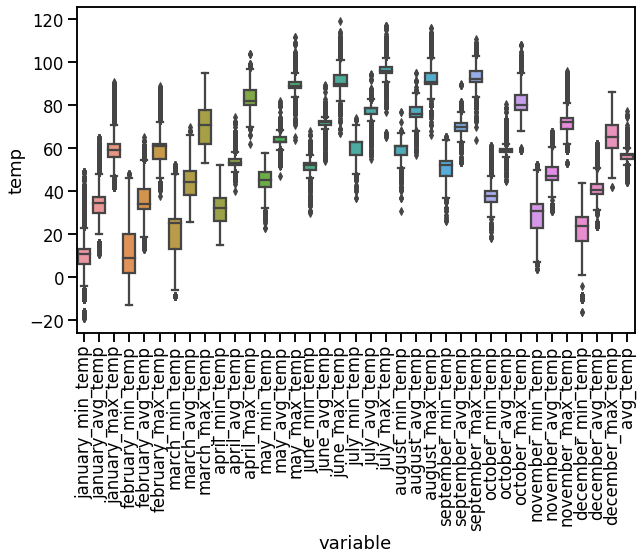

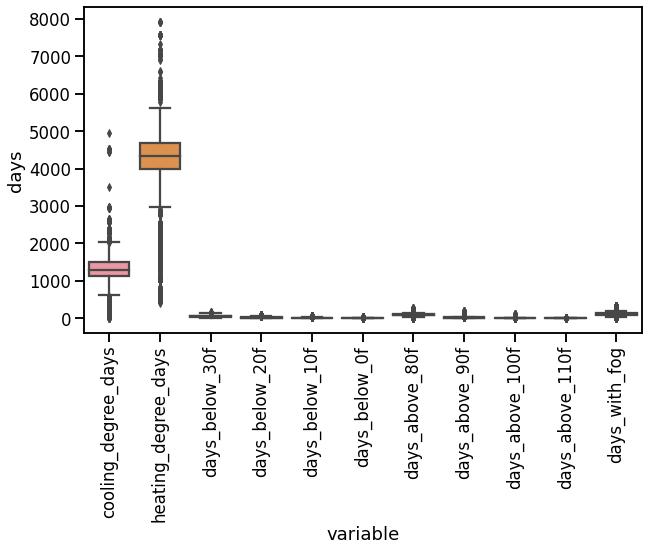

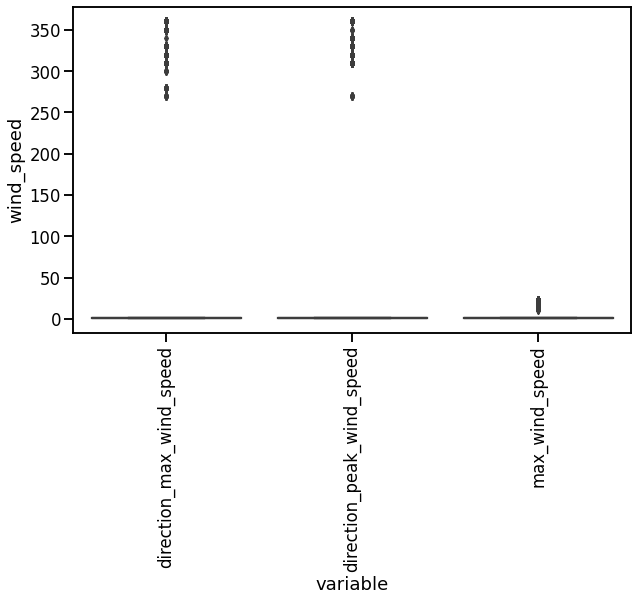

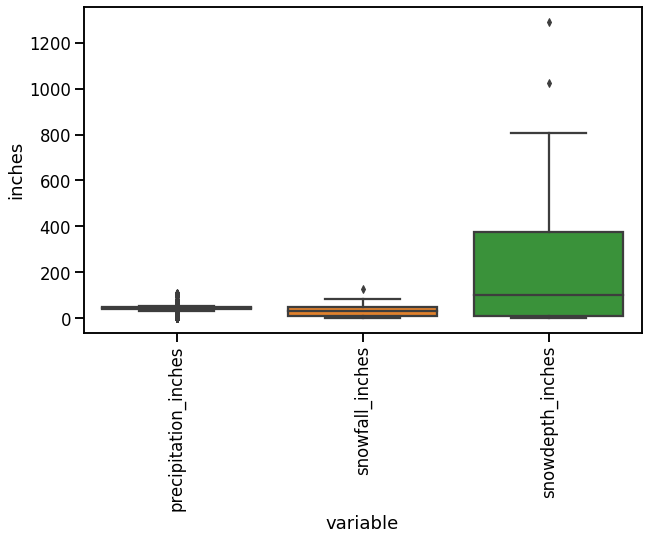

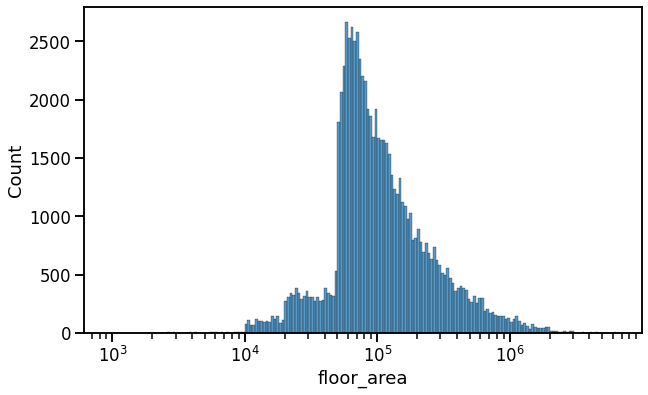

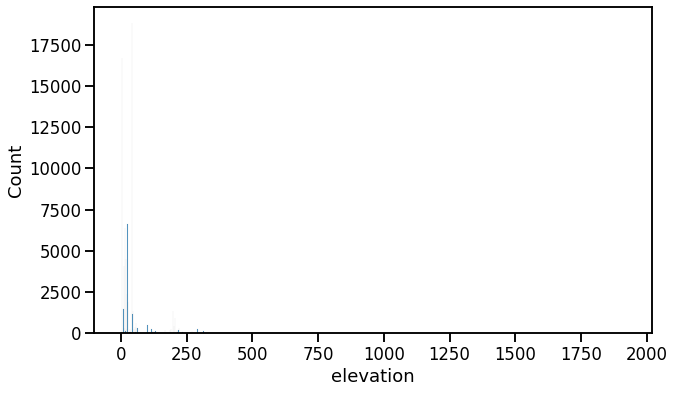

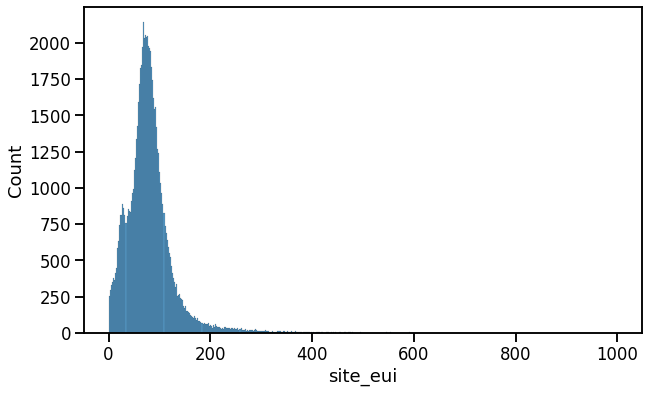

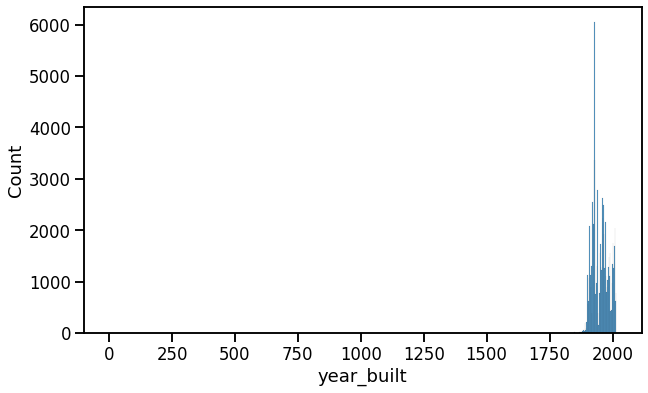

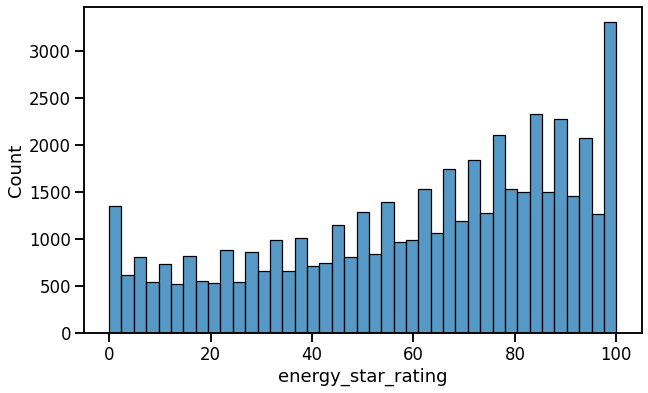

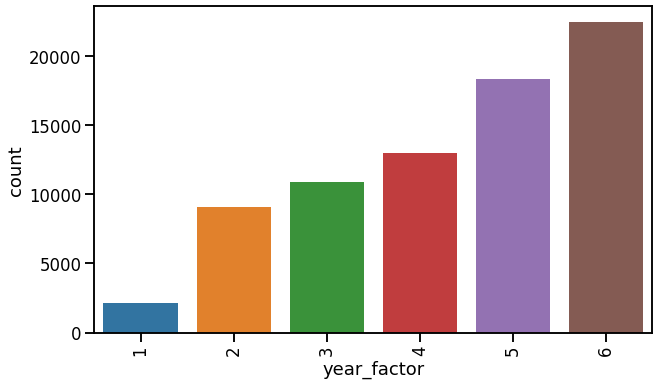

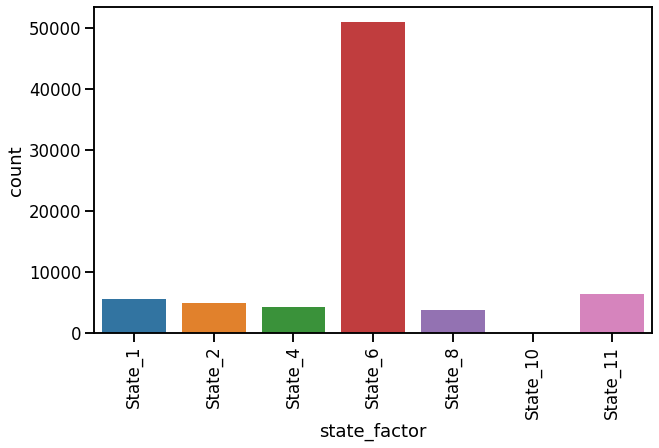

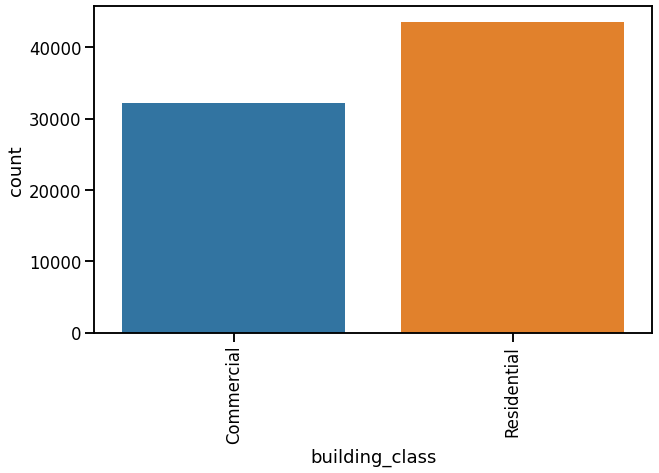

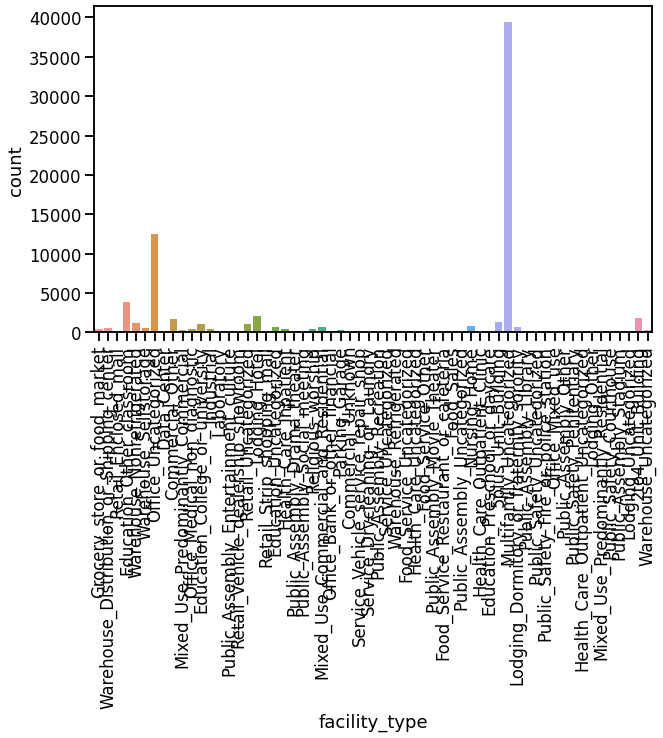

In [ ]:
quick_visualize_raw_features(train_df)

In [ ]:
facility_type_df = train_df['facility_type'].drop_duplicates().str.lower().str.split("_", expand=True)
pd.melt(facility_type_df)['value'].value_counts().reset_index(name='count').query('count>1')
# for i in range(facility_type_df.shape[1]):
#   print(facility_type_df[i].value_counts())

,index,count
0,public,13
1,uncategorized,12
2,or,9
3,assembly,9
4,service,7
5,other,6
6,warehouse,5
7,food,5
8,health,4
9,safety,4
